In [0]:
# !pip install -U scikit-fuzzy # http://pythonhosted.org/scikit-fuzzy/auto_examples/index.html
# Instalar via terminal

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

/ext/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


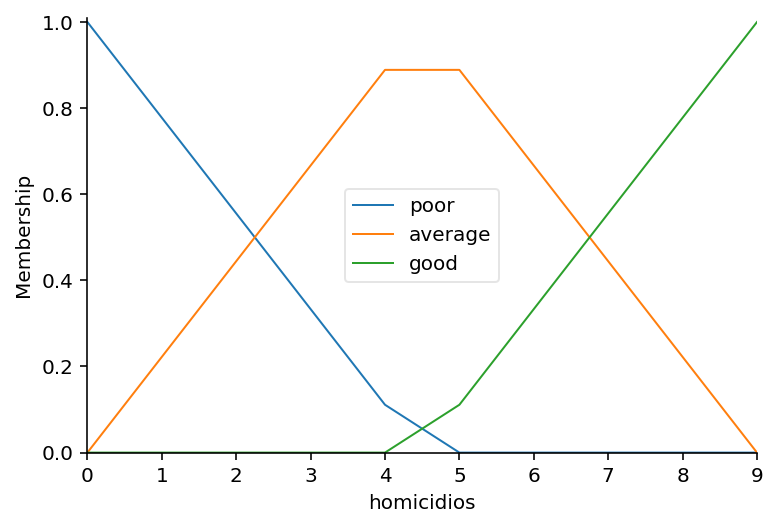

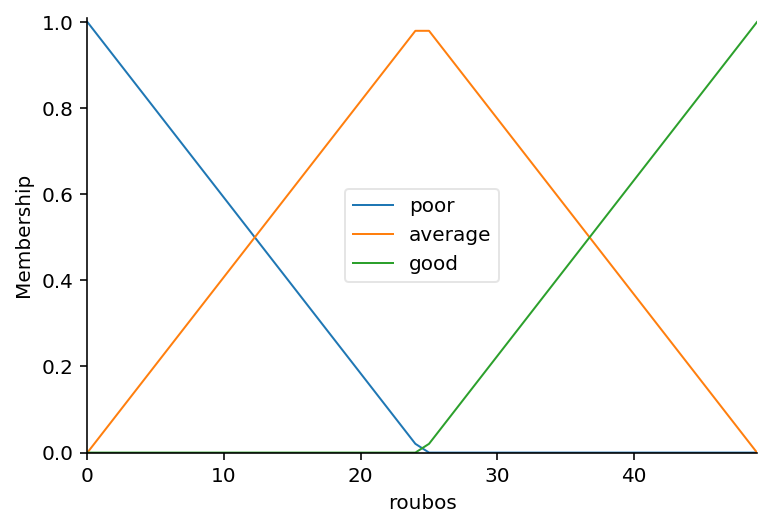

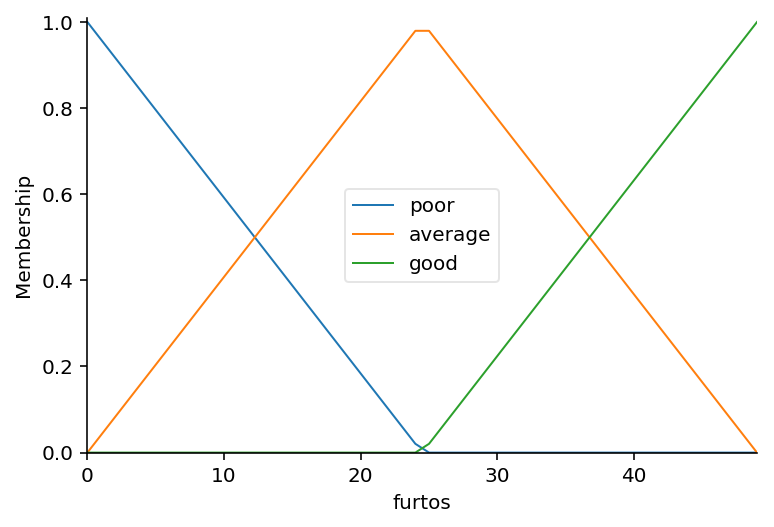

In [12]:
# Variáveis Antecedentes/Consequentes
hom = ctrl.Antecedent(np.arange(0, 10, 1), 'homicidios')
rou = ctrl.Antecedent(np.arange(0, 50, 1), 'roubos')
fur = ctrl.Antecedent(np.arange(0, 50, 1), 'furtos')

crim = ctrl.Consequent(np.arange(0, 101, 1), 'criminalidade')

# define funções de pertinência convencionais (3, 5, ou 7)
hom.automf(3)
rou.automf(3)
fur.automf(3)

hom.view()
rou.view()
fur.view()

/ext/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


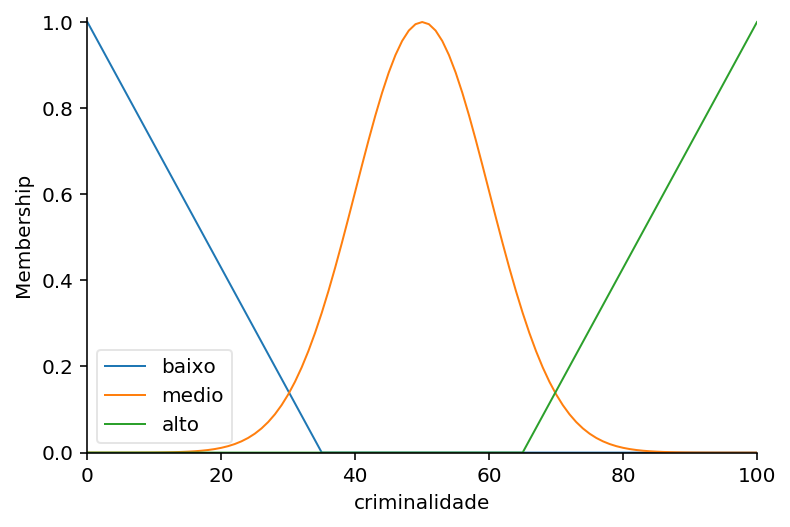

In [19]:
crim = ctrl.Consequent(np.arange(0, 101, 1), 'criminalidade')

crim['baixo'] = fuzz.trimf(crim.universe, [0, 0, 35])
crim['medio'] = fuzz.gaussmf(crim.universe, 50, 10)
crim['alto']  = fuzz.trimf(crim.universe, [65, 100, 100])

crim.view()

/ext/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


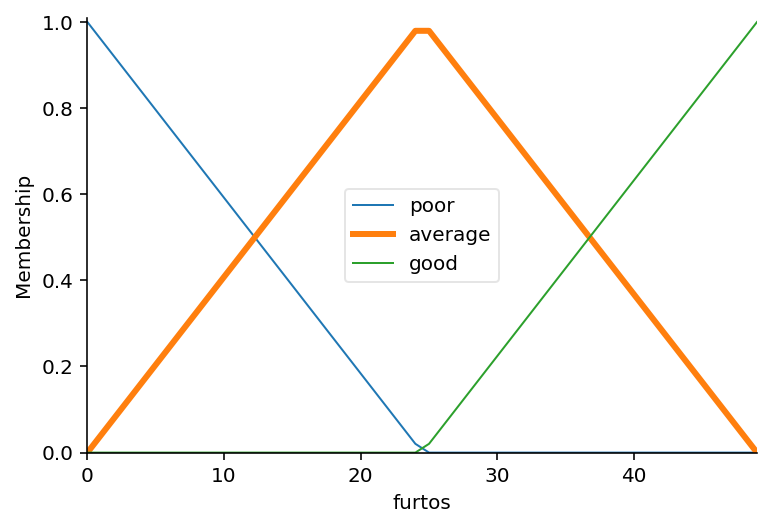

In [14]:
fur['average'].view() # O termo "average" vem do automf

In [21]:
regra1 = ctrl.Rule(rou['poor']     & fur['poor']     & hom['poor'],                   crim['baixo'])
regra2 = ctrl.Rule((rou['average'] | fur['average']) & hom['poor'],                   crim['medio'])
regra3 = ctrl.Rule(rou['good']     | fur['good']     | hom['good'] | hom['average'],  crim['alto'])

In [23]:
crim_ctrl = ctrl.ControlSystem([regra1, regra2, regra3])
crim_sim = ctrl.ControlSystemSimulation(crim_ctrl)

In [29]:
# Entrada
crim_sim.input['roubos'] = 10
crim_sim.input['furtos'] = 15
crim_sim.input['homicidios'] = 2

# Calcula
crim_sim.compute()
crim_sim.output

OrderedDict([('criminalidade', 51.145698813932803)])

51.1456988139


/ext/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


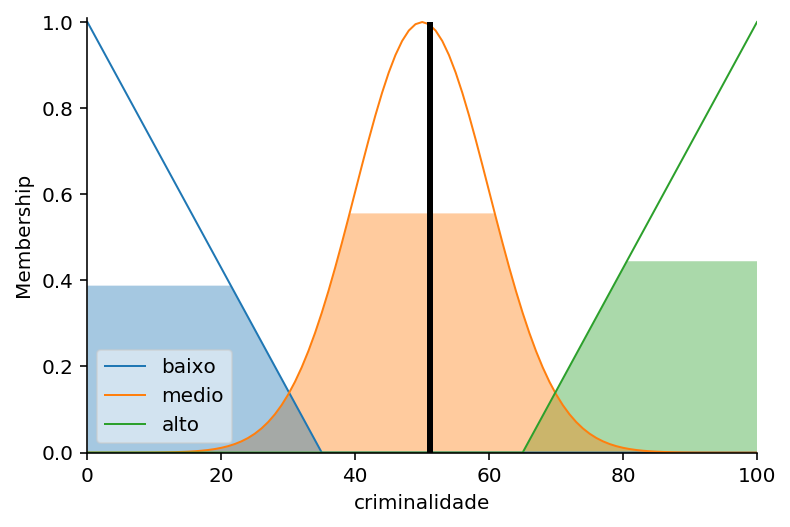

In [30]:
print(crim_sim.output['criminalidade'])
crim.view(sim=crim_sim)